In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("docs/metrics_1.csv")
df = df.fillna(0)

In [44]:
data =df.iloc[:,np.r_[1:16]]
X = df.iloc[:,np.r_[1:7, 12:16]]
Y = df.iloc[:,np.r_[7:12]]
scaler = StandardScaler() 
X_sc = scaler.fit_transform(X) #scale data
Y_sc = scaler.fit_transform(Y) 

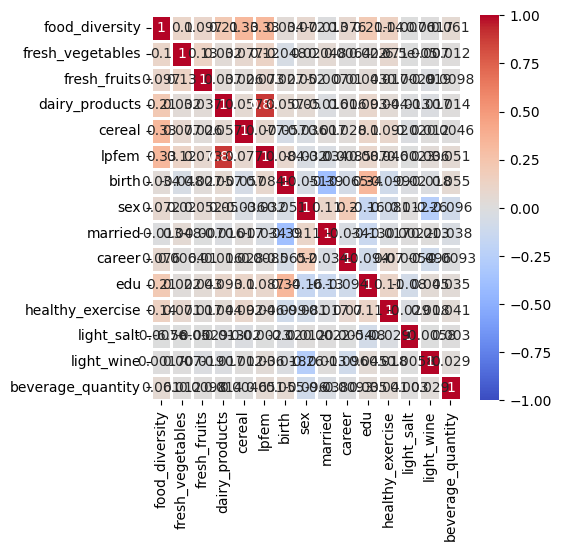

In [45]:
corr_coeff = data.corr()
plt.figure(figsize = (5, 5))
sns.heatmap(corr_coeff, cmap='coolwarm', annot=True, linewidths=1, vmin=-1)
plt.show()

In [58]:
n_comp = 2
cca = CCA(n_components=n_comp)
cca.fit(X_sc, Y_sc)
X_c, Y_c = cca.transform(X_sc, Y_sc)
print(np.corrcoef(X_c[:, 1], Y_c[:, 1])[0, 1]) #输出相关系数
print(cca.coef_)


0.2942605699586671
[[-0.12846895  0.1085407   0.01863998  0.17744693  0.44987305]
 [-0.01719433  0.04244062  0.00412934  0.03243779  0.06740484]
 [ 0.00660709  0.07879932  0.00398258  0.01713822 -0.00139048]
 [-0.08268098  0.4576287   0.03470375  0.23489923  0.389467  ]
 [-0.09574543 -0.21778402 -0.00359797  0.03928276  0.25830851]
 [ 0.09138594 -0.47207074 -0.0363818  -0.24912889 -0.42177658]
 [-0.19361644 -0.35273745 -0.00214229  0.10672399  0.54494416]
 [ 0.06167393  0.07467131 -0.00152457 -0.04572626 -0.18329753]
 [-0.12195965 -0.46999046 -0.01586015 -0.00990335  0.27940075]
 [-0.0183164  -0.12245756 -0.0054195  -0.01763292  0.02859332]]


<BarContainer object of 2 artists>

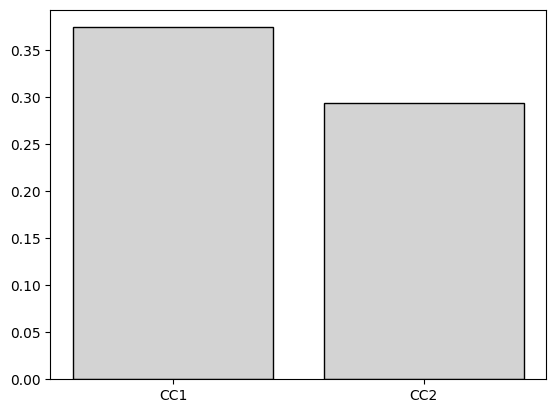

In [60]:

comp_corr = [np.corrcoef(X_c[:, i], Y_c[:, i])[1][0] for i in range(n_comp)]
plt.bar(['CC1', 'CC2'], comp_corr, color='lightgrey', width = 0.8, edgecolor='k')

In [61]:
cca.x_loadings_ 

array([[-0.90609784,  0.51034755],
       [-0.18088289,  0.12426103],
       [-0.35669688,  0.02164535],
       [-0.45797474,  0.11869401],
       [-0.12878203,  0.457493  ],
       [-0.0140234 ,  0.1391255 ],
       [ 0.00693079,  0.65501512],
       [ 0.12831156, -0.206465  ],
       [ 1.26751111,  0.36653763],
       [ 0.43148451,  0.10307881]])

In [62]:
cca.y_loadings_

array([[ 1.01558791e-02, -2.94587111e-01],
       [-9.50408015e-01, -4.79947831e-01],
       [-5.66252360e-02,  6.31887432e-05],
       [-3.07176924e-01,  1.80041532e-01],
       [-2.78285615e-01,  8.43754761e-01]])

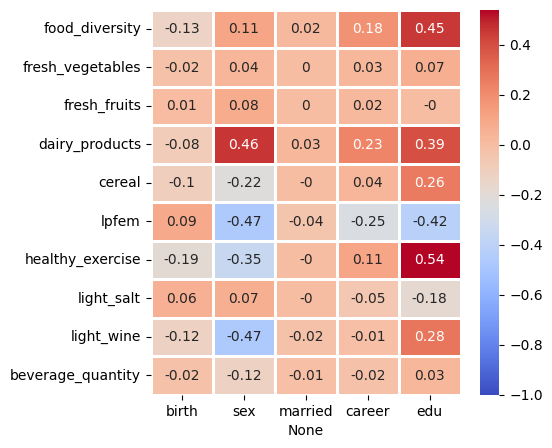

In [65]:
coef_df = pd.DataFrame(np.round(cca.coef_, 2), columns = [Y.columns])
coef_df.index = X.columns
plt.figure(figsize = (5, 5))
sns.heatmap(coef_df, cmap='coolwarm', annot=True, linewidths=1, vmin=-1)
plt.show()